**EXPLORATORY DATA ANALYSIS**

In [25]:
# Install if missing
!pip install seaborn wordcloud

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:

df = pd.read_csv('final_combined_data.csv')

# Unique value count per column
print("\n🔹 Unique values per column:\n", df.nunique())


🔹 Unique values per column:
 Ticket ID                       1000000
Customer Name                    329802
Customer Email                   329802
Customer Age                         48
Customer Gender                       3
Product Purchased                    15
Date of Purchase                    367
Ticket Type                           4
Ticket Subject                       60
Ticket Description                   60
Ticket Status                         4
Resolution                            2
Ticket Priority                       3
Ticket Channel                        4
First Response Time                2871
Time to Resolution                  168
Customer Satisfaction Rating          5
category                              3
return_window_days                    3
refund_allowed                        1
replacement_allowed                   2
restocking_fee                        2
return_policy_description             3
dtype: int64


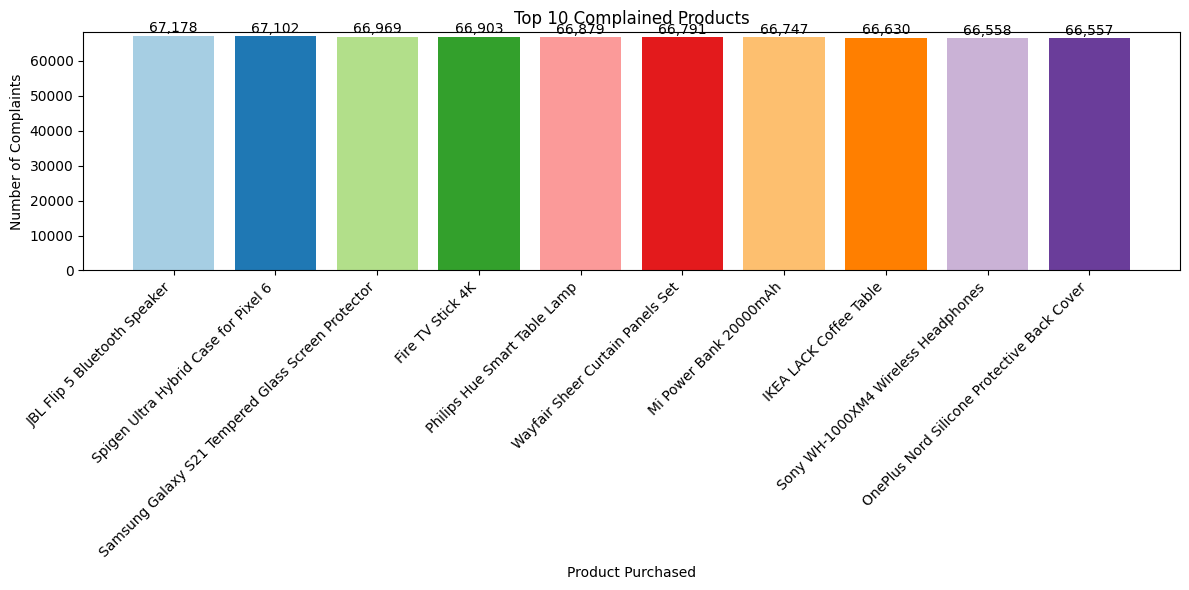

In [27]:
# Top 10 most complained products
top_products = df['Product Purchased'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_products.index, top_products.values, color=sns.color_palette('Paired'))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Complained Products')
plt.xlabel('Product Purchased')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, top_products.max() + 1000)
plt.tight_layout()
plt.show()

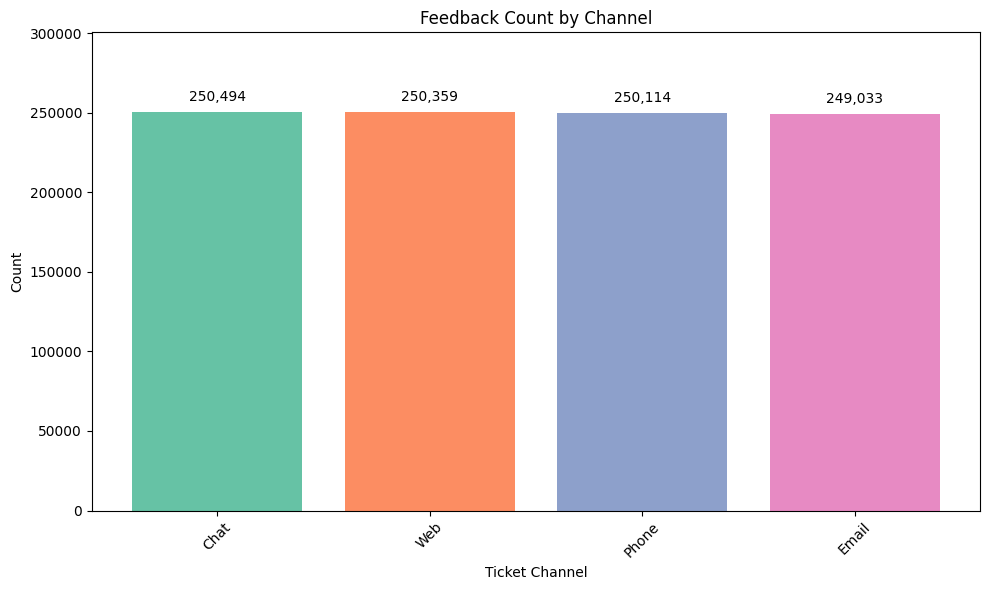

In [28]:
# Count the number of feedbacks per channel
channel_counts = df['Ticket Channel'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_counts.index, channel_counts.values, color=sns.color_palette('Set2', len(channel_counts)))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5000,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.title('Feedback Count by Channel')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, channel_counts.max() + 50000)
plt.tight_layout()
plt.show()

Complaint Volume per Product Category


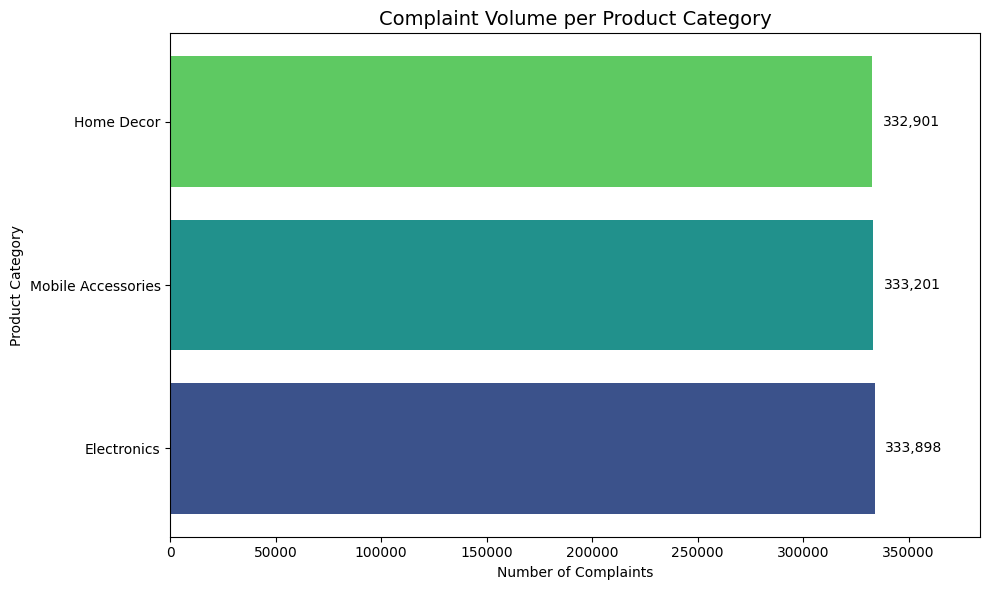

In [29]:
# Count the number of complaints per category
category_counts = df['category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(category_counts.index, category_counts.values, color=sns.color_palette('viridis', len(category_counts)))

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

plt.title('Complaint Volume per Product Category', fontsize=14)
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.xlim(0, category_counts.max() + 50000)
plt.tight_layout()
plt.show()

<ipython-input-30-336f36cbcebd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index, palette='Set2')


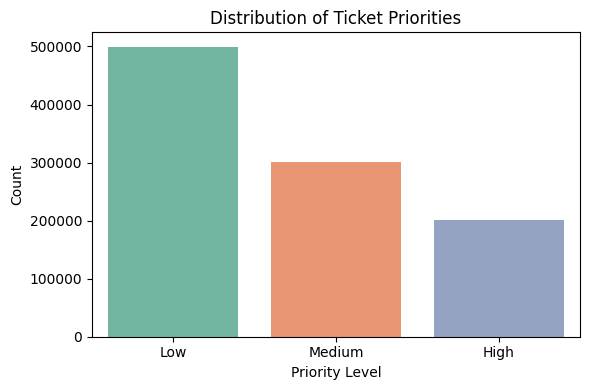

In [30]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index, palette='Set2')
plt.title("Distribution of Ticket Priorities")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


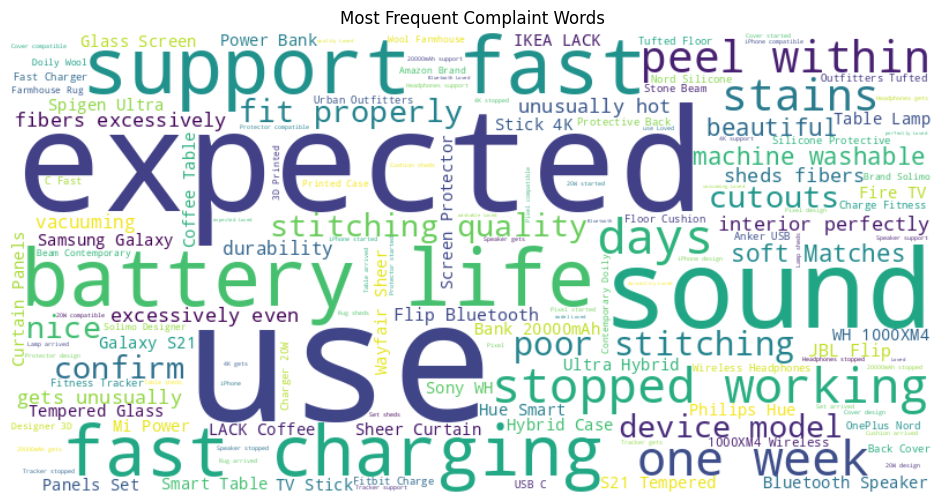

In [24]:
# Word Cloud of Complaints
text = ' '.join(str(review) for review in df['Ticket Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Complaint Words")
plt.show()


**Ticket Trend Analysis**

<ipython-input-36-3d9e7eeecd89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Ticket Type', data=df, palette='viridis')


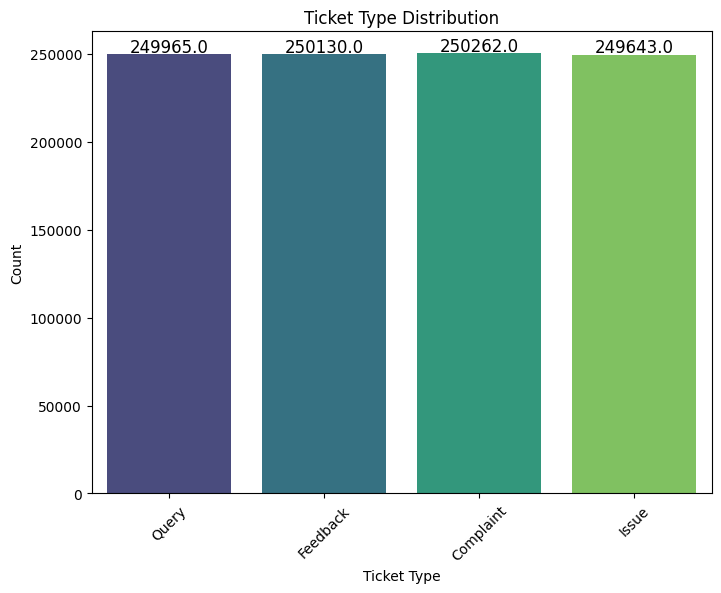

<ipython-input-36-3d9e7eeecd89>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Ticket Status', data=df, palette='Set2')


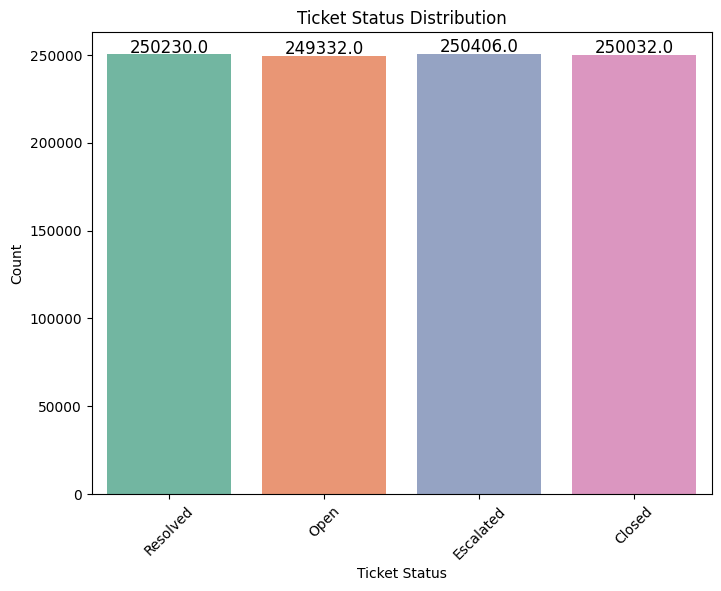

<ipython-input-36-3d9e7eeecd89>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette='Blues')


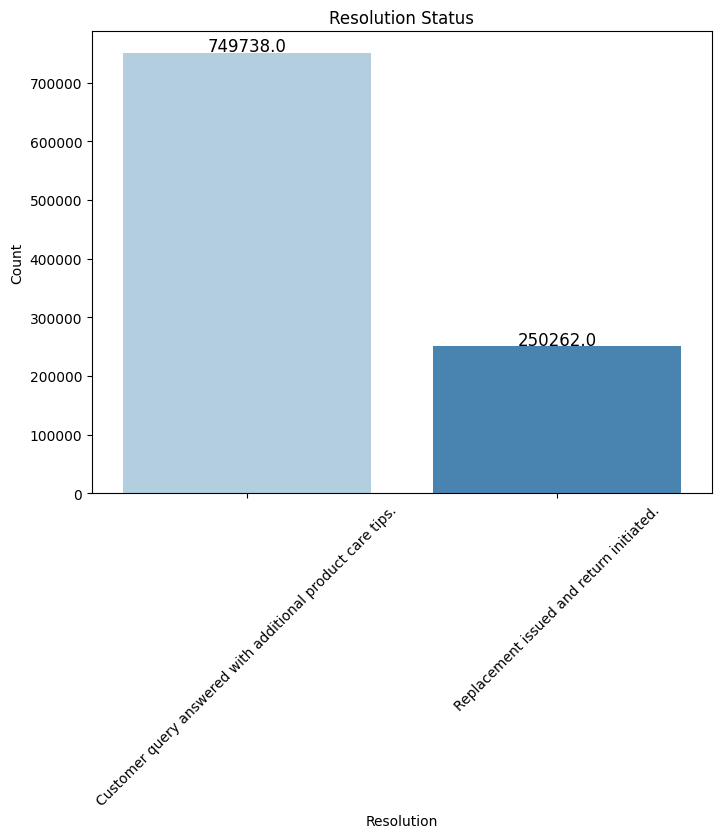

In [36]:
# 1. Ticket Type Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ticket Type', data=df, palette='viridis')
plt.title('Ticket Type Distribution')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add exact values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# 2. Ticket Status Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ticket Status', data=df, palette='Set2')
plt.title('Ticket Status Distribution')
plt.xlabel('Ticket Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add exact values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# 3. Resolution Analysis
# Check how many tickets are resolved vs unresolved
resolution_counts = df['Resolution'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette='Blues')
plt.title('Resolution Status')
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add exact values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


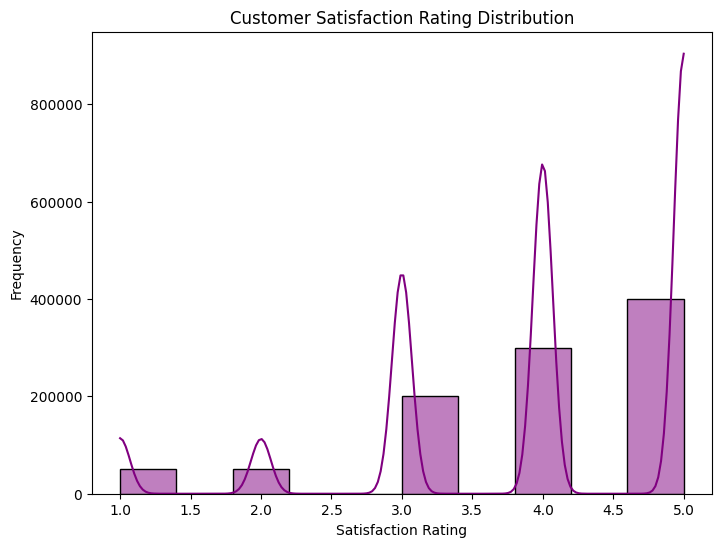

In [43]:

#Customer Satisfaction Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer Satisfaction Rating'], bins=10, kde=True, color='purple')
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

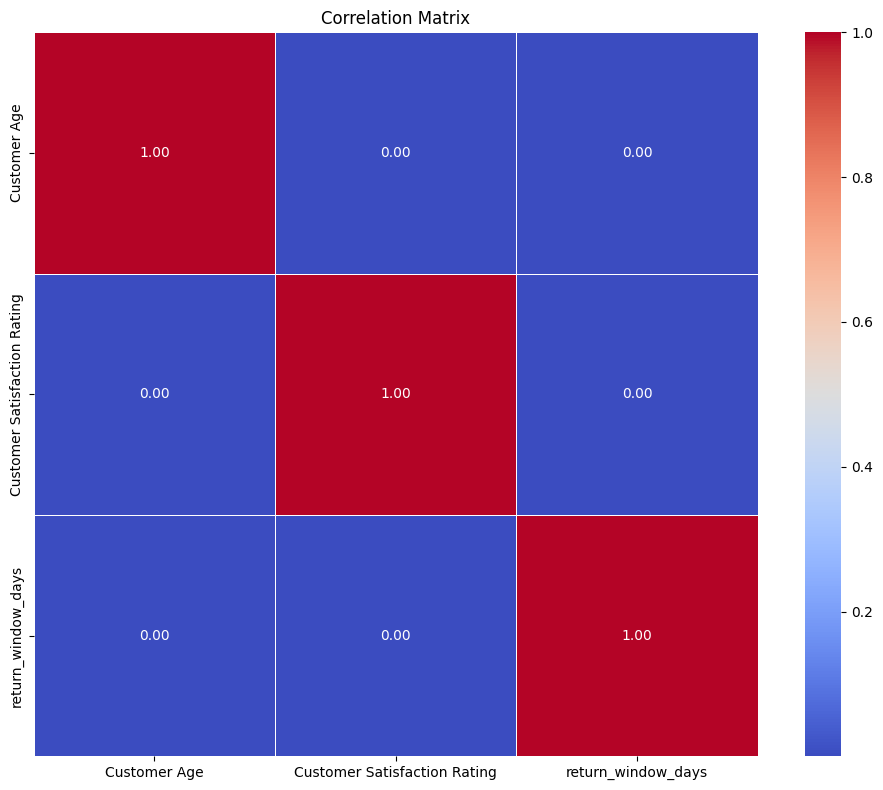

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
